In [1]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import animation

In [2]:
#求解
Cxab = np.array([
    [2,1],
    [1,1]
])
Cab = np.array([12, 7]).reshape(2, 1)
Cxab_inv = np.linalg.inv(Cxab)
ansab = Cxab_inv.dot(Cab)

Cxac = np.array([
    [2,1],
    [1,3]
])
Cac = np.array([12, 15]).reshape(2, 1)
Cxac_inv = np.linalg.inv(Cxac)
ansac = Cxac_inv.dot(Cac)

Cxbc = np.array([
    [1,1],
    [1,3]
])
Cbc = np.array([7, 15]).reshape(2, 1)
Cxbc_inv = np.linalg.inv(Cxbc)
ansbc = Cxbc_inv.dot(Cbc)

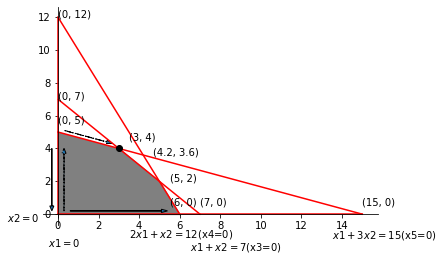

In [3]:
#平面圖
plt.figure()

txt_adjust = 0.5
x1 = np.linspace(0, 7, 300) 
x1a = np.linspace(0, 12, 300) 
x1b = np.linspace(0, 15, 300) 

x2a = 12-2*x1a
x2b = 7-x1
x2c = (15-x1b)/3
x2d = np.zeros([len(x1b)])
x1e = x2d
x2e = x1a
ax = plt.gca()

xx=np.zeros([len(x1),2])
for i in range (len(x1)):
    xx[i,0] = x1[i]
    xx[i,1] = min((12-2*x1[i]),7-x1[i],(15-x1[i])/3)

x = xx[xx[:,1]>=-0.05]
        
plt.fill_between(x[:,0], x[:,1], color='#808080',)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.plot(x1a[(x2a<12)&(x2a>-0.01)], x2a[(x2a<12)&(x2a>-0.01)], 'r')
plt.plot(x1[(x2b<7)&(x2b>-0.01)], x2b[(x2b<7)&(x2b>-0.01)], 'r')
plt.plot(x1b[(x2c<7)&(x2c>-0.01)], x2c[(x2c<7)&(x2c>-0.01)], 'r')
plt.plot(3, 4, 'o', color='k')
plt.plot(x1b, x2d, 'r')
plt.plot(x1e, x2e, 'r')


ax.annotate('({}, {})'.format('%.0f' %ansab[0,0], '%.0f' %ansab[1,0]),
            xy=(ansab[0,0], ansab[1,0]), xytext=(ansab[0,0] + txt_adjust, ansab[1,0]))
ax.annotate('({}, {})'.format('%.1f' %ansac[0,0], '%.1f' %ansac[1,0]),
            xy=(ansac[0,0], ansac[1,0]), xytext=(ansac[0,0] + txt_adjust, ansac[1,0]))
ax.annotate('({}, {})'.format('%.0f' %ansbc[0,0], '%.0f' %ansbc[1,0]),
            xy=(ansbc[0,0], ansbc[1,0]), xytext=(ansbc[0,0] + txt_adjust, ansbc[1,0]+txt_adjust))
ax.annotate('({}, {})'.format(6, 0),
            xy=(5.5, 0.5), xytext=(5 + txt_adjust, 0.5))
ax.annotate('({}, {})'.format(0, 5),
            xy=(0, 5.5), xytext=(0 , 5.5))
ax.annotate('({}, {})'.format(7, 0),
            xy=(6.5, 0.5), xytext=(6.5 + txt_adjust, 0.5))
ax.annotate('({}, {})'.format(0, 7),
            xy=(0, 6.5), xytext=(0 , 7))
ax.annotate('({}, {})'.format(15, 0),
            xy=(14.5, 0.5), xytext=(14.5 + txt_adjust, 0.5))
ax.annotate('({}, {})'.format(0, 12),
            xy=(0, 11.5), xytext=(0 , 12))

ax.annotate(r'$2x1 + x2 = 12$(x4=0)', xy=(4, 10), xytext=(4 - txt_adjust, -1.4))
ax.annotate(r'$x1 + x2 = 7$(x3=0)', xy=(6, 0), xytext=(6 + txt_adjust, -2.2))
ax.annotate(r'$x1 + 3x2 = 15$(x5=0)', xy=(14, 1.5), xytext=(14 - txt_adjust, -1.5))
ax.annotate(r'$x2 = 0$', xy=(0, 0), xytext=(-2 - txt_adjust, -0.5))
ax.annotate(r'$x1 = 0$', xy=(0, 0), xytext=(0 - txt_adjust, -2))

plt.arrow(0.3,0.2,0.0,3.5, head_width=0.2, width=0.01, ls = '-.', lw = 1)
plt.arrow(0.6,0.2,4.5,0.0, head_width=0.2, width=0.01, lw = 1)
plt.arrow(0.3,5.1,2.1,-0.7, head_width=0.2, width=0.01, ls = '-.', lw = 1)
plt.arrow(-0.3,4.0,0.0,-3.5, head_width=0.2, width=0.01, lw = 1)


plt.show()

<IPython.core.display.Javascript object>


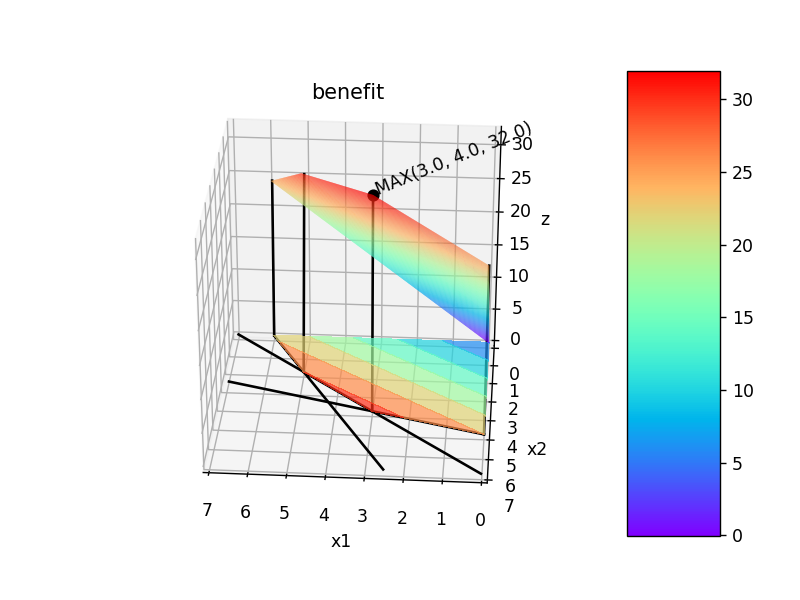

In [4]:
%matplotlib notebook
#將圖轉成可動模式
fig = plt.figure() 
ax = plt.axes(projection="3d") 

plt.plot(x1a[(x2a<7)&(x2a>-0.01)], x2a[(x2a<7)&(x2a>-0.01)], 'k')
plt.plot(x1[(x2b<7)&(x2b>-0.01)], x2b[(x2b<7)&(x2b>-0.01)], 'k')
plt.plot(x1b[(x2c<7)&(x2c>-0.01)&(x1b<=7)], x2c[(x2c<7)&(x2c>-0.01)&(x1b<=7)], 'k')

def z(x1, x2): 
    return 4*x1+5*x2 

X1,X2=np.meshgrid(x[:,0],x[:,1])
for i in range (len(X1)):
    for j in range (len(X2)):
        X2[i,j] = min(X2[i,j],(12-2*X1[i,j]),7-X1[i,j],(15-X1[i,j])/3)

Z = z(X1,X2)
#計算z值
plt3d = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=1)
# 畫X1、X2、Z之平面圖
plt2d = ax.contourf(X1, X2, Z, zdir='z', offset=0, cmap=plt.get_cmap('rainbow'), alpha=0.7)
#平面圖投影到X1、X2平面上

maxx = 0
maxy = 0
maxz = 0
for i in range (len(Z)):
    for j in range (len(Z)):
        if Z[i,j]>maxz:
            maxz = Z[i,j]
            maxx = X1[i,j]
            maxy = X2[i,j]
maxx = [round(maxx)]
maxy = [round(maxy)]           
maxz = [round(maxz)]

ax.plot(maxx, maxy, maxz, 'k', marker='.',markersize=12)
#找出z之最大值並標出點
for x, y, z in zip(maxx, maxy, maxz): 
    text = 'MAX(' + str(x) + ', ' + str(y) + ', ' + str(z) + ')'
    ax.text(x, y, z, text, zdir=(45, 45, 0)) 
#標出z之最大值的座標
fig.colorbar(plt3d, shrink=5, aspect=5)
#色彩之Z高度對應表
plt.xlim(0, 7)
plt.ylim(0, 7)
#設定X1、X2的範圍
pax1 = X1[(X1>5.9)&(X1<6.1)&(X2>-0.1)&(X2<0.1)][0]
pax2 = X2[(X1>5.9)&(X1<6.1)&(X2>-0.1)&(X2<0.1)][0]
paz = Z[(X1>5.9)&(X1<6.1)&(X2>-0.1)&(X2<0.1)][0]
pbx1 = X1[(X1>(ansab[0,0]-0.1))&(X1<(ansab[0,0]+0.1))&(X2>(ansab[1,0]-0.1))&(X2<(ansab[1,0]+0.1))][0]
pbx2 = X2[(X1>(ansab[0,0]-0.1))&(X1<(ansab[0,0]+0.1))&(X2>(ansab[1,0]-0.1))&(X2<(ansab[1,0]+0.1))][0]
pbz = Z[(X1>(ansab[0,0]-0.1))&(X1<(ansab[0,0]+0.1))&(X2>(ansab[1,0]-0.1))&(X2<(ansab[1,0]+0.1))][0]
pcx1 = X1[(X1>-0.1)&(X1<0.1)&(X2>4.9)&(X2<5.1)][0]
pcx2 = X2[(X1>-0.1)&(X1<0.1)&(X2>4.9)&(X2<5.1)][0]
pcz = Z[(X1>-0.1)&(X1<0.1)&(X2>4.9)&(X2<5.1)][0]

ax.plot((maxx[0],ansbc[0,0]),(maxy[0],ansbc[1,0]),(maxz[0],0),'k')
ax.plot((pax1,6),(pax2,0),(paz,0),'k')
ax.plot((pbx1,ansab[0,0]),(pbx2,ansab[1,0]),(pbz,0),'k')
ax.plot((pcx1,0),(pcx2,5),(pcz,0),'k')
#畫垂直線
ax.set_xlabel('x1') 
ax.set_ylabel('x2') 
ax.set_zlabel('z') 
ax.set_title('benefit')
#替三軸、總標題命名
def rotate(angle): 
    ax.view_init(azim=angle) 
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,361,1),interval=5)
#圖動畫化
plt.show()